# If GA fitting
**Akwasi Darkwah Akwaboah**<br>
2/19/2020

**GA trial - master**

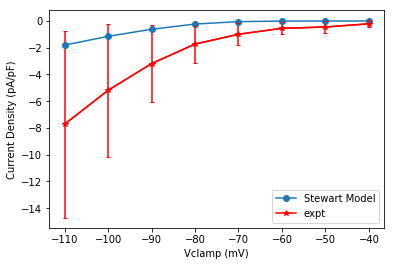

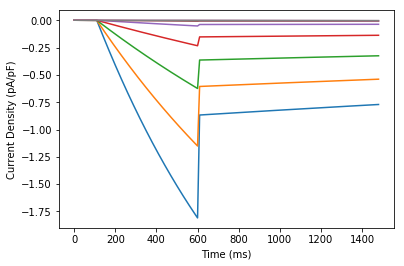

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import If_worker

Vcm = np.arange(-110, -39, 10)

If_act = np.array(
[-7.719292191, -5.191894995, -3.191078509, -1.729348794, -0.995212502, -0.550478633, -0.451653444, -0.213560445])
If_err = np.array([7.004261908, 4.972815047, 2.878205575, 1.38609859, 0.816391, 0.443526266, 0.421838918, 0.266044595])

ini_par = np.array([0.02343, 0.01456, 2.9, 0.04, 3.6, 0.11, 4000])
If_IVini = If_worker.If_func(ini_par)
time, plt_If_ini, yf_ini = If_worker.If_func_time(ini_par)

plt.figure()
plt.plot(Vcm, If_IVini, '-o', label = 'Stewart Model')
plt.plot(Vcm, If_act, 'r-*', label='expt')
plt.errorbar(Vcm, If_act, yerr=If_err, capsize=2, color='red')
plt.legend()
plt.xlabel('Vclamp (mV)')
plt.ylabel('Current Density (pA/pF)')
plt.savefig('If_IV.png')
plt.show()

plt.figure()
plt.plot(time, plt_If_ini)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.savefig('If_time.png')
plt.show()


GA Trial 9
*************************************************************************************
generation:  0
Runtime:  0.004816059651784599 mins
Best fitness:  27.731715952563125
generational solution:  [3.12746566e-02 1.75905566e-02 2.62675939e+00 4.38267124e-02
 3.99977071e+00 1.08754466e-01 3.90074681e+03]


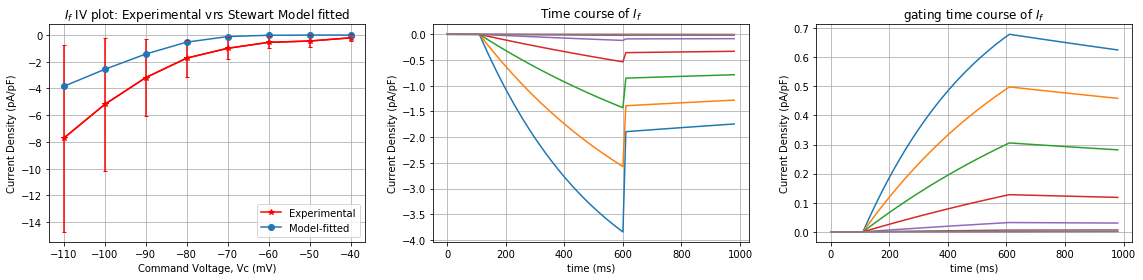

generation:  10
Runtime:  0.0686129562013472 mins
Best fitness:  1.488144058446117
generational solution:  [4.48850443e-02 1.88033186e-02 2.38549599e+00 4.80610178e-02
 3.67854776e+00 7.36545763e-02 3.27735835e+03]


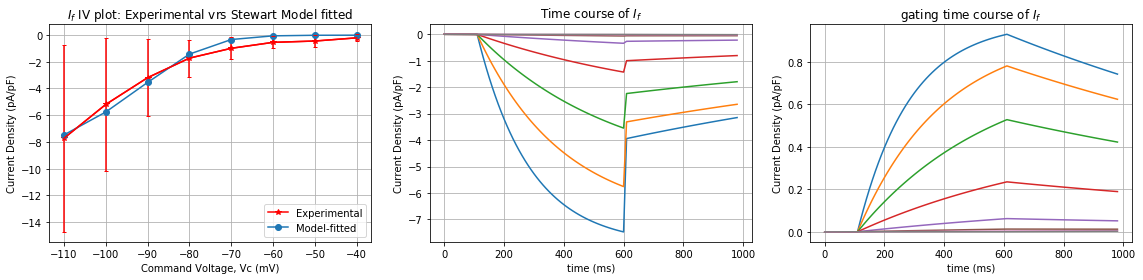

generation:  20
Runtime:  0.1680094142211601 mins
Best fitness:  1.1465204022017783
generational solution:  [5.33239144e-02 1.36416435e-02 1.82448795e+00 3.80006872e-02
 3.66621609e+00 6.56129755e-02 3.40110271e+03]


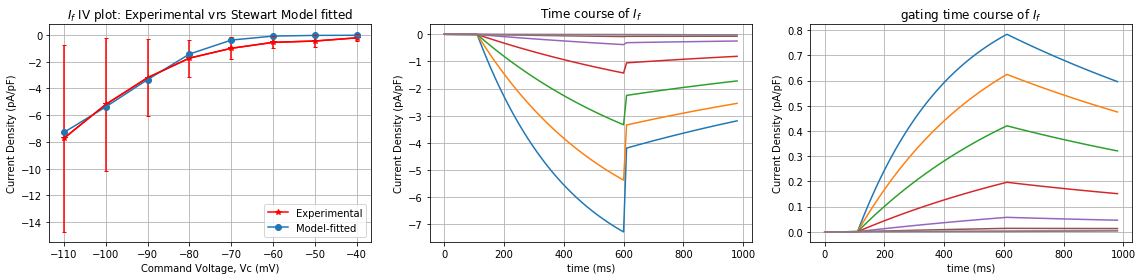

generation:  30
Runtime:  0.3218386066146195 mins
Best fitness:  0.8229243432729829
generational solution:  [6.74993493e-02 1.90036543e-02 1.97551514e+00 3.73520566e-02
 4.33321225e+00 6.06324711e-02 4.16165092e+03]


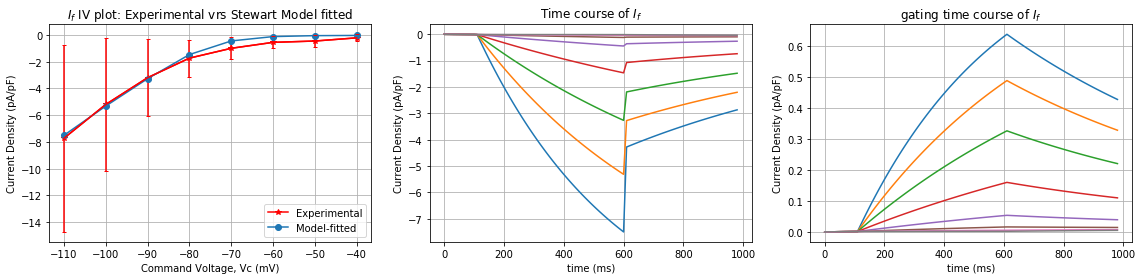

generation:  40
Runtime:  0.583163531551448 mins
Best fitness:  0.6394283627328264
generational solution:  [6.64633775e-02 1.72715948e-02 2.34726834e+00 4.03708234e-02
 4.72481329e+00 5.83309143e-02 3.86159962e+03]


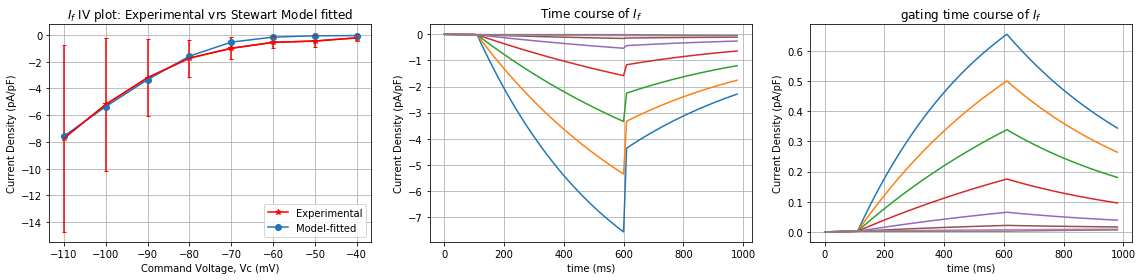

generation:  50
Runtime:  1.0236802511150018 mins
Best fitness:  0.5104526235325327
generational solution:  [7.60345624e-02 1.86038005e-02 2.50924619e+00 4.03294421e-02
 5.15587873e+00 6.25930257e-02 4.07387654e+03]


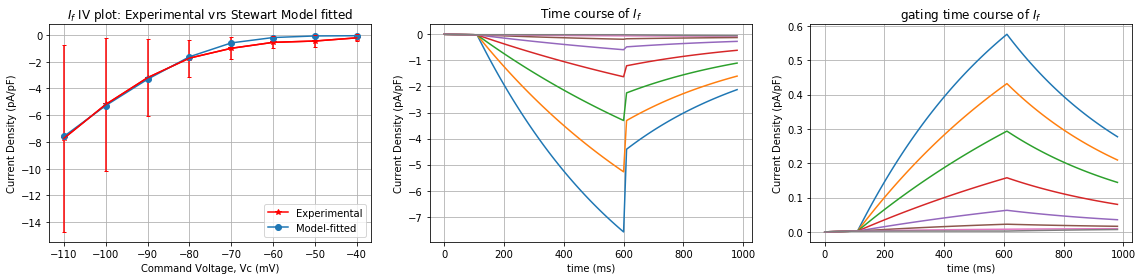

generation:  60
Runtime:  1.5732789774502938 mins
Best fitness:  0.4786238838532156
generational solution:  [7.46197191e-02 2.02786259e-02 2.63694915e+00 4.20778149e-02
 5.71910219e+00 6.15813858e-02 4.39138104e+03]


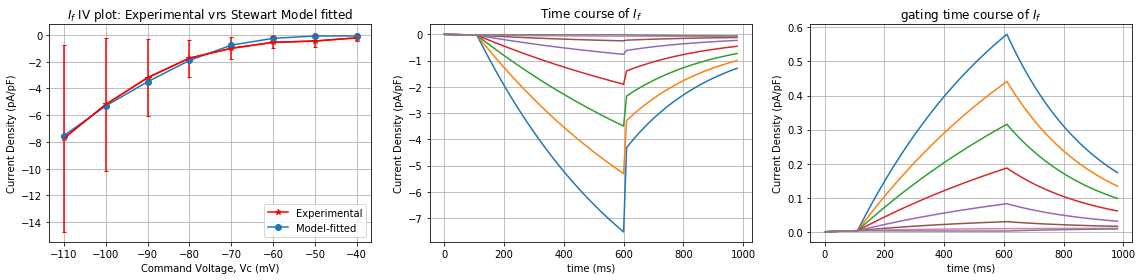

generation:  70
Runtime:  2.3350658224041885 mins
Best fitness:  0.37568840234043416
generational solution:  [8.02954519e-02 1.88493242e-02 2.88421812e+00 4.35833635e-02
 5.83583241e+00 6.44004589e-02 4.45069440e+03]


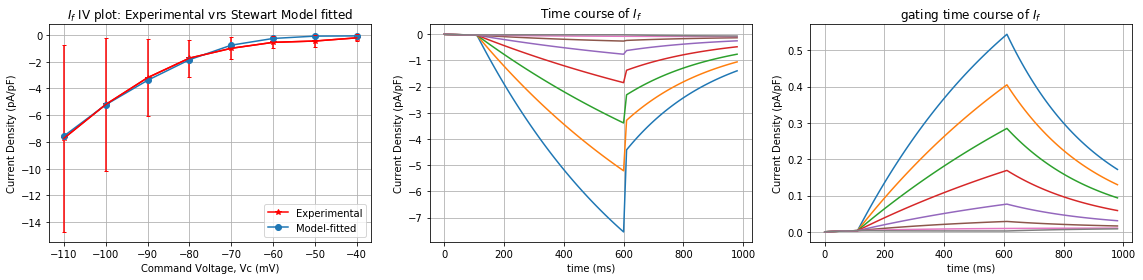

generation:  80
Runtime:  3.5226771225842337 mins
Best fitness:  0.34279180411936844
generational solution:  [8.87125328e-02 2.11687046e-02 2.79498310e+00 4.12896619e-02
 5.94277573e+00 7.11088170e-02 4.19066404e+03]


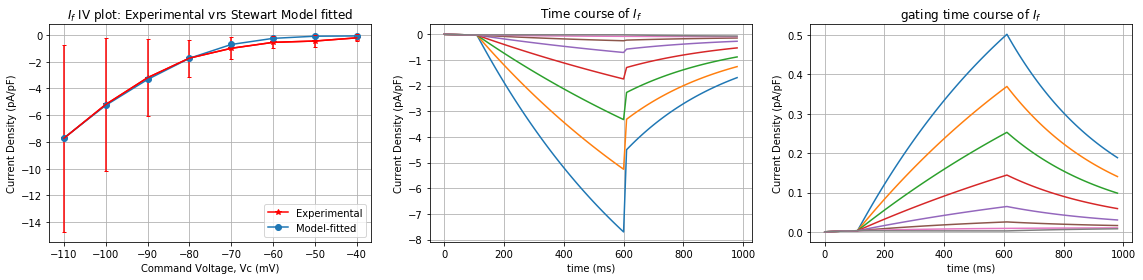

generation:  90
Runtime:  5.05406157670077 mins
Best fitness:  0.29123116010385885
generational solution:  [8.75083232e-02 1.71588313e-02 3.01258099e+00 4.34747286e-02
 6.28924478e+00 7.40400475e-02 4.17195927e+03]


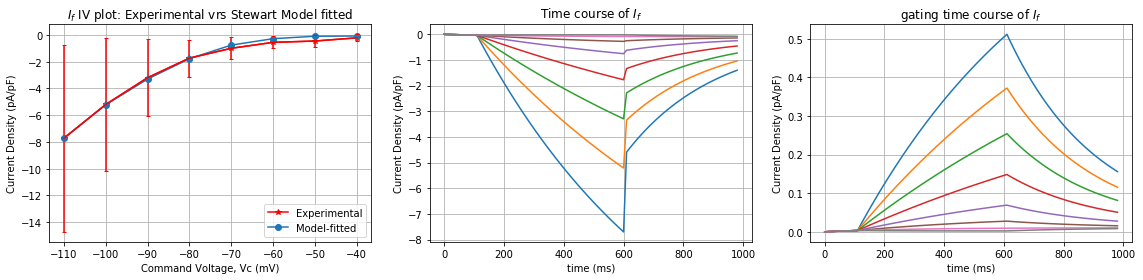

generation:  100
Runtime:  6.677546559801946 mins
Best fitness:  0.2765172210656633
generational solution:  [8.84195890e-02 1.71588313e-02 3.09769634e+00 4.44607119e-02
 6.46605024e+00 7.61515720e-02 4.30688783e+03]


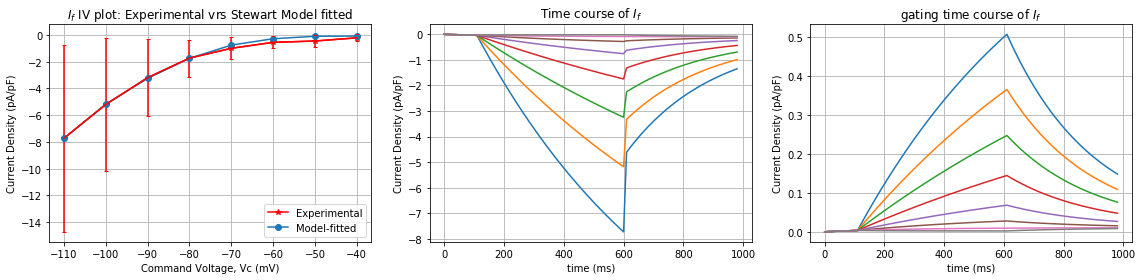

-------------------------------------------------------------------
Best Solution:  [8.84195890e-02 1.71588313e-02 3.09769634e+00 4.44607119e-02
 6.46605024e+00 7.61515720e-02 4.30688783e+03]
Final Fitness:  0.2765172210656633
Total Runtime:  6.707910198632939 mins
ini_r2:  -0.20504165782982597
fit_r2:  0.9945830990128862


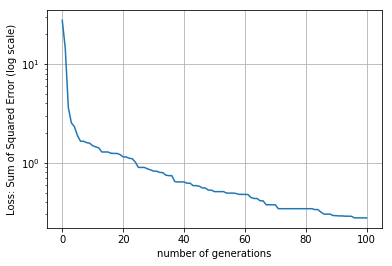

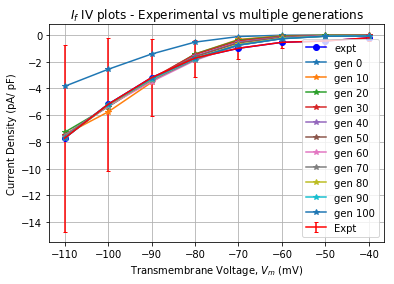

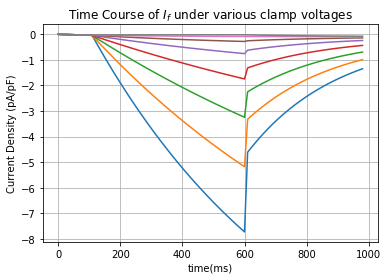

In [1]:
import timeit
import numpy as np
import matplotlib.pyplot as plt
import If_worker
from multiprocessing import Pool
from sklearn.metrics import r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

Runtime_arr = []
class GA_trial:
    gen_num = 0
    loss = 0
    R_sq_ini = 0
    R_sq_fin = 0
    Parameters = 0
    final_fit_Val = 0
    time = 0
    cur_time_fit = 0
    cur_time_ini = 0
    Vcm = 0
    I_peaks_fin = 0
    I_peaks_ini = 0
    Runtime = 0

ini_par = np.array([0.02343, 0.01456, 2.9, 0.04, 3.6, 0.11, 4000])
If_IVini = If_worker.If_func(ini_par)
time_ini, plt_If_ini, yf_ini = If_worker.If_func_time(ini_par)


timer_start = timeit.default_timer()

V = np.arange(-110, -39, 10)

If_act = np.array(
[-7.719292191, -5.191894995, -3.191078509, -1.729348794, -0.995212502, -0.550478633, -0.451653444, -0.213560445])
If_err = np.array([7.004261908, 4.972815047, 2.878205575, 1.38609859, 0.816391, 0.443526266, 0.421838918, 0.266044595])

#double If_par[] = {0.02343, 0.01456, 80.6, 6.8, 2.9, 0.04, 3.6, 0.11, 4000};
pop_size = 80

# fitness
def pop_fitness(ppln):
        p = Pool(processes = 28)
        gen_start_time_parlel = timeit.default_timer()
        If_cur = p.map(If_worker.If_func, ppln)
        gen_finish_time_parlel = timeit.default_timer()
        #print('generation runtime (parallel) = ',(gen_finish_time_parlel - gen_start_time_parlel)/60, 'mins')    
        SSE = np.sum(np.power((If_cur - If_act), 2, dtype=np.float64), axis=1)
        return SSE

def select_mating_pool(popn, fitness, num_parents):
    parents = np.empty((num_parents, popn.shape[1]))
    for parent_no in range(num_parents):
        max_fit_idx = np.where(fitness == np.min(fitness))  # find max and return its index
        max_fit_idx = max_fit_idx[0][0]  # Select the first index if repetitive
        parents[parent_no, :] = popn[max_fit_idx, :]
        fitness[max_fit_idx] = +9999999999999
    return parents

# 2-point crossover
def crossover(parents,
              offspring_size):  # in the case offspring size = (k, 3) where k is the number of desired offsprings
    offspring = np.empty(offspring_size)
    #pt1 = np.random.randint(1, offspring_size[1]/2)  # randomize the crossover point, typically the middle is chosen
    #pt2
    #crossover_point1 = np.uint8(offspring_size[1] / pt)
    crossover_point1 = np.uint8(np.random.randint(1, offspring_size[1]/2))
    crossover_point2 = np.uint8(np.random.randint(offspring_size[1]/2, offspring_size[1]))

    for n in range(parents.shape[0]):
        # parent selection
        parent1_idx = n % parents.shape[0]  # using modulus helps implement a ring parent selection fashion
        parent2_idx = (n + 1) % parents.shape[0]
        # offspring will have a up to the crossover point proportion from parent1 and parent2 respectively
        # Actual crossover
        # todo: generate two offsprings instead of one
        offspring[n, 0:crossover_point1] = parents[parent1_idx, 0:crossover_point1]
        offspring[n, crossover_point1:crossover_point2] = parents[parent2_idx, crossover_point1:crossover_point2]
        offspring[n, crossover_point2:] = parents[parent1_idx, crossover_point2:]
        #second offspring
        offspring[n + parents.shape[0], 0:crossover_point1] = parents[parent1_idx, 0:crossover_point1]
        offspring[n + parents.shape[0], crossover_point1:]  = parents[parent2_idx, crossover_point1:]
        
    return offspring

def mutation(offspring_crossover):
    gen_alpha = np.random.uniform(0.0, 0.2)
    mutation_coeff = np.random.uniform(1-gen_alpha, 1+gen_alpha, (offspring_crossover.shape[0], offspring_crossover.shape[1]))
    mutants = mutation_coeff*offspring_crossover # various percentage of the parameters
    return mutants

num_of_trials = 10

for trial_count in np.arange(0, num_of_trials): #for loop repeat GA process for data logging
    timer_start = timeit.default_timer()
    C = np.empty((pop_size, 7))
    pop_alpha = np.random.uniform(0.0, 0.5, C.shape[1])
    for i in range(C.shape[1]):
        C[:, i] = np.random.uniform((1 - pop_alpha[i])*ini_par[i], (1 + pop_alpha[i])*ini_par[i], C.shape[0])

If_cur = np.empty((C.shape[0], len(V)))
population = C  # initial Population

print('GA Trial %s' %trial_count)
print('*************************************************************************************')

i_plt = 0
gen_mod = 10
num_of_gens = 101
no_plts = num_of_gens/gen_mod
no_plts = np.int16(no_plts)
gen_curr_arr = np.zeros((len(V), num_of_gens))
num_mating_parents = int(C.shape[0]/5)
best_gen_fitness = []

for generation in range(num_of_gens):
    fitness = pop_fitness(population)  # calculate fitness (SSE)
    fitness = np.where(np.isnan(fitness), 1e120, fitness) #handles the dreaded nan's
    #fitness = np.where(np.isinf(fitness), 0, fitness)
    best_gn_fit_idx = np.where(fitness == np.min(fitness))
    indx = best_gn_fit_idx[0][0]
    best_gen_fitness.append(fitness[indx])

    if generation%gen_mod == 0:
        best_gn_fit_idx = np.where(fitness == np.min(fitness))
        indx = best_gn_fit_idx[0][0]
        gen_num = np.arange(len(best_gen_fitness))
        timer_stop = timeit.default_timer()
        print('generation: ', generation)
        Rtime = (timer_stop - timer_start)/60.0
        print('Runtime: ', Rtime , 'mins')
        print('Best fitness: ', fitness[indx])
        Runtime_arr.append(Rtime)

        y_fit = If_worker.If_func(population[indx,:])
        time, plot_If_fit, yf = If_worker.If_func_time(population[indx,:])
        gen_curr_arr[:, i_plt] = y_fit
        print('generational solution: ',population[indx, :])
        plt.figure(figsize=(16,4))
        plt.subplot(131)
        plt.plot(V, If_act, 'r-*', V, y_fit, '-o')
        plt.legend(['Experimental', 'Model-fitted'], loc='best')
        plt.errorbar(V, If_act, yerr=If_err, capsize=2, color='red')
        plt.xlabel('Command Voltage, Vc (mV)')
        plt.ylabel('Current Density (pA/pF)')
        plt.title('$I_{f}$ IV plot: Experimental vrs Stewart Model fitted')
        plt.grid()

        plt.subplot(132)
        plt.grid()
        plt.plot(time, plot_If_fit)
        plt.xlabel('time (ms)')
        plt.ylabel('Current Density (pA/pF)')
        plt.legend(loc='lower right')
        plt.title('Time course of $I_{f}$')
        
        plt.subplot(133)
        plt.grid()
        plt.plot(time, yf)
        plt.xlabel('time (ms)')
        plt.ylabel('Current Density (pA/pF)')
        plt.legend(loc='lower right')
        plt.title('gating time course of $I_{f}$')
        plt.tight_layout()
        plt.show()

    if generation == num_of_gens-1:
        Best_Sol = population[indx, :]
        final_fitness = fitness[indx]
        print('-------------------------------------------------------------------')
        print('Best Solution: ', Best_Sol)
        print('Final Fitness: ', final_fitness)
        ini_r2 = r2_score(If_act, If_IVini)
        fit_r2 = r2_score(If_act, y_fit)

    parents = select_mating_pool(population, fitness, num_mating_parents)  # choose mating parents based on best min SSE
#     print(parents.shape[0])
    offspring_crossed = crossover(parents, offspring_size=(2*parents.shape[0], population.shape[1]))
    offspring_mutated = mutation(offspring_crossed)
    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]: 3 * parents.shape[0], :] = offspring_crossed
    population[3 * parents.shape[0]:, :] = offspring_mutated

    i_plt = i_plt + 1

timer_stop = timeit.default_timer()        
print('Total Runtime: ', (timer_stop - timer_start)/60.0, 'mins')

gen_num = np.arange(len(best_gen_fitness))

#fitted model
If_IVfit = If_worker.If_func(Best_Sol)
time_fit, plt_If_fit, yfa_fit = If_worker.If_func_time(Best_Sol)

print('ini_r2: ', ini_r2)
print('fit_r2: ', fit_r2)

GA_trial_n = GA_trial()
GA_trial_n.gen_num = gen_num
GA_trial_n.loss = best_gen_fitness
GA_trial_n.final_fit_val = final_fitness
GA_trial_n.R_sq_ini = ini_r2
GA_trial_n.R_sq_fin = fit_r2
GA_trial_n.Parameters = Best_Sol
GA_trial_n.time = time
GA_trial_n.cur_time_ini = plt_If_ini
GA_trial_n.cur_time_fit = plt_If_fit
GA_trial_n.Vcm = V
GA_trial_n.gen_fit_arr = gen_curr_arr
GA_trial_n.I_peaks_fin = y_fit
GA_trial_n.I_peaks_ini = If_IVini
GA_trial_n.Runtime = Runtime_arr

pickle.dump(GA_trial_n, open('If_GA_trial_n%s.p' %trial_count, 'wb'))

gen_num = np.arange(len(best_gen_fitness))
plt.figure()
plt.plot(gen_num, best_gen_fitness)
plt.yscale('log')
plt.xlabel('number of generations')
plt.ylabel('Loss: Sum of Squared Error (log scale)')
plt.grid()
plt.show()

plt.figure()
plt.plot(V, If_act, 'b-o', label = 'expt')
plt.errorbar(V, If_act, yerr=If_err, capsize=2, label = 'Expt', color = 'red')
for cnt in np.arange(0,gen_curr_arr.shape[1], gen_mod):
    plt.plot(V, gen_curr_arr[:, cnt], '-*', label='gen %s' %cnt)

plt.xlabel('Transmembrane Voltage, $V_m$ (mV)')
plt.ylabel('Current Density (pA/ pF)')
plt.title('$I_{f}$ IV plots - Experimental vs multiple generations')
plt.grid()
plt.legend(loc='best')
plt.show()

plt.figure()
plt.plot(time, plt_If_fit)
plt.xlabel('time(ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Time Course of $I_{f}$ under various clamp voltages')
plt.grid()
plt.show()

## Analysis

Parameters_______
0:  [6.91822628e-02 2.86427124e-02 2.73896905e+00 4.33194830e-02
 4.58897542e+00 4.96845584e-02 4.12612880e+03]
1:  [5.02968027e-02 7.02798870e-02 1.68826991e+00 3.67280874e-02
 5.17628426e+00 5.35050858e-02 4.01031320e+03]
2:  [4.41341962e-02 6.12458145e-02 2.81226195e+00 4.96608447e-02
 4.28680468e+00 3.62388488e-02 4.08895927e+03]
3:  [4.54807114e-02 6.08243783e-02 2.22257846e+00 4.41355825e-02
 5.62768986e+00 5.52193574e-02 4.07695298e+03]
4:  [5.31502714e-02 3.30491163e-02 3.05656065e+00 4.92431787e-02
 4.80254728e+00 4.67556568e-02 4.19752057e+03]
5:  [5.09992729e-02 4.36877732e-02 4.33143799e+00 6.18867529e-02
 5.37945992e+00 4.87692300e-02 4.03179381e+03]
6:  [6.17032756e-02 3.00809062e-02 1.94649697e+00 3.79093817e-02
 5.46065519e+00 6.21097604e-02 4.16895549e+03]
7:  [7.70473165e-02 1.01464197e-01 1.28000988e+00 2.70722505e-02
 6.39907089e+00 7.85477690e-02 4.06889296e+03]
8:  [4.65547434e-02 4.86217707e-02 2.48169325e+00 4.66788803e-02
 6.08594028e+00 6.202

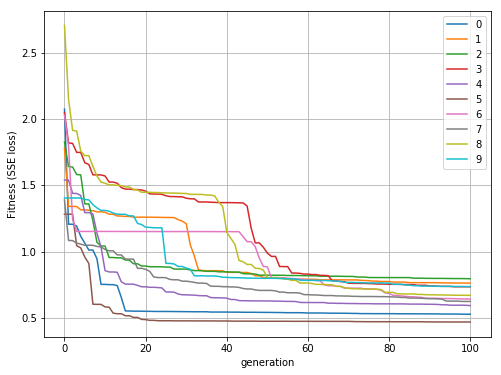

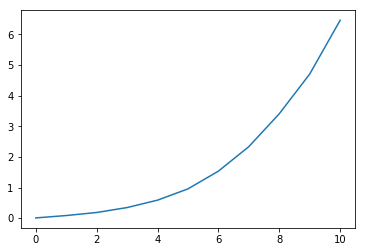

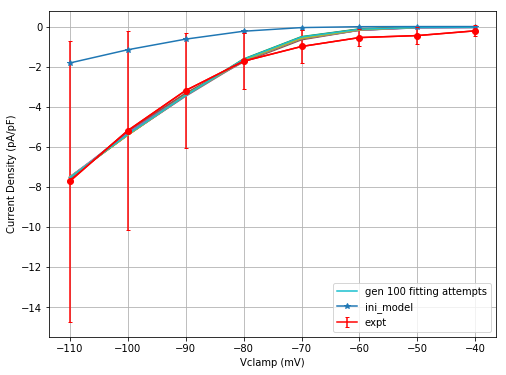

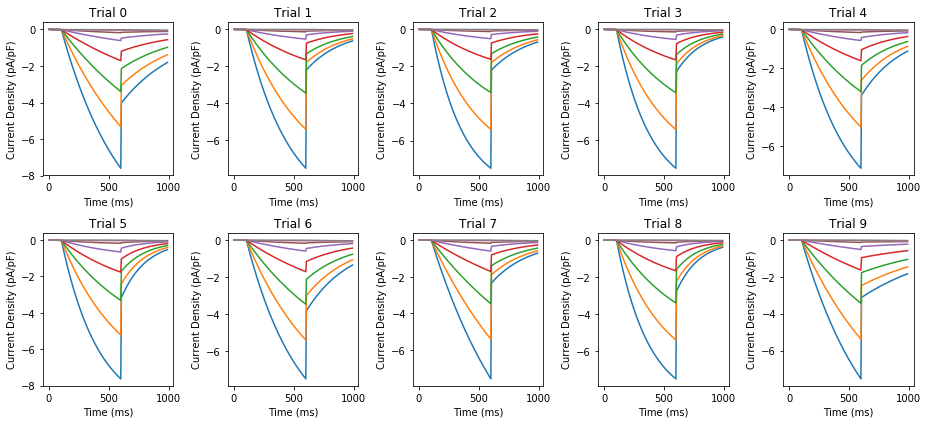

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import If_worker

Vcm = np.arange(-110, -39, 10)
# If_ini_par = np.array([0.02343, 0.01456, 80.6, 6.8, 2.9, 0.04, 3.6, 0.11, 4000])
If_ini_par = np.array([0.02343, 0.01456, 2.9, 0.04, 3.6, 0.11, 4000])
If_act = np.array(
    [-7.719292191, -5.191894995, -3.191078509, -1.729348794, -0.995212502, -0.550478633, -0.451653444, -0.213560445])
If_err = np.array([7.004261908, 4.972815047, 2.878205575, 1.38609859, 0.816391, 0.443526266, 0.421838918, 0.266044595])

If_pks = If_worker.If_func(If_ini_par)
time, plt_If = If_worker.If_func_time(If_ini_par)

class GA_trial:
    gen_num = 0
    loss = 0
    R_sq_ini = 0
    R_sq_fin = 0
    Parameters = 0
    final_fit_Val = 0
    time = 0
    cur_time_fit = 0
    cur_time_ini = 0
    Vcm = 0
    gen_fit_arr = 0
    I_peaks_fin = 0
    I_peaks_ini = 0
    Runtime = 0
    

GA0 = pickle.load(open('If_GA_trial0.p', 'rb'))
GA1 = pickle.load(open('If_GA_trial1.p', 'rb'))
GA2 = pickle.load(open('If_GA_trial2.p', 'rb'))
GA3 = pickle.load(open('If_GA_trial3.p', 'rb'))
GA4 = pickle.load(open('If_GA_trial4.p', 'rb'))
GA5 = pickle.load(open('If_GA_trial5.p', 'rb'))
GA6 = pickle.load(open('If_GA_trial6.p', 'rb'))
GA7 = pickle.load(open('If_GA_trial7.p', 'rb'))
GA8 = pickle.load(open('If_GA_trial8.p', 'rb'))
GA9 = pickle.load(open('If_GA_trial9.p', 'rb'))

print('Parameters_______')
print('0: ', GA0.Parameters)
print('1: ', GA1.Parameters)
print('2: ', GA2.Parameters)
print('3: ', GA3.Parameters)
print('4: ', GA4.Parameters)
print('5: ', GA5.Parameters)
print('6: ', GA6.Parameters)
print('7: ', GA7.Parameters)
print('8: ', GA8.Parameters)
print('9: ', GA9.Parameters)
print('\n')

print('R_sq_____')
print('0: ', GA0.R_sq_fin)
print('1: ', GA1.R_sq_fin)
print('2: ', GA2.R_sq_fin)
print('3: ', GA3.R_sq_fin)
print('4: ', GA4.R_sq_fin)
print('5: ', GA5.R_sq_fin)
print('6: ', GA6.R_sq_fin)
print('7: ', GA7.R_sq_fin)
print('8: ', GA8.R_sq_fin)
print('9: ', GA9.R_sq_fin)
print('\n')

ICaL_trials_r2 = np.array([GA0.R_sq_fin, GA1.R_sq_fin, GA2.R_sq_fin, GA3.R_sq_fin, GA4.R_sq_fin, 
                           GA5.R_sq_fin, GA6.R_sq_fin, GA7.R_sq_fin, GA8.R_sq_fin, GA9.R_sq_fin])
# ICaL_trials_fit = np.array([GA0.final_fit_val, GA1.final_fit_val, GA2.final_fit_val, GA3.final_fit_val, GA4.final_fit_val, 
#                             GA5.final_fit_val, GA6.final_fit_val, GA7.final_fit_val, GA8.final_fit_val, GA9.final_fit_val])

r2_mean = np.mean(ICaL_trials_r2)
r2_stdv = np.std(ICaL_trials_r2)

loss_ini = np.array([GA0.loss[0], GA1.loss[0], GA2.loss[0], GA3.loss[0], GA4.loss[0], 
                     GA5.loss[0], GA6.loss[0], GA7.loss[0], GA8.loss[0], GA9.loss[0]])

loss_fin = np.array([GA0.loss[-1], GA1.loss[-1], GA2.loss[-1], GA3.loss[-1], GA4.loss[-1], 
                     GA5.loss[-1], GA6.loss[-1], GA7.loss[-1], GA8.loss[-1], GA9.loss[-1]])

loss_ini_mean = np.mean(loss_ini)
loss_ini_stdv = np.std(loss_ini)

loss_fin_mean = np.mean(loss_fin)
loss_fin_stdv = np.std(loss_fin)

print('R_sq:______')
print('mean R_sq: ', r2_mean)
print('std R_sq: ', r2_stdv)

print('initial losses:______\n ', loss_ini)
print('mean initial loss: ', loss_ini_mean)
print('std initial loss: ', loss_ini_stdv)

print('final losses:______\n ', loss_fin)
print('mean final loss: ', loss_fin_mean)
print('std final loss: ', loss_fin_stdv)

plt.figure(figsize=(8,6))
plt.plot(GA0.gen_num, GA0.loss, label = 0)
plt.plot(GA1.gen_num, GA1.loss, label = 1)
plt.plot(GA2.gen_num, GA2.loss, label = 2)
plt.plot(GA3.gen_num, GA3.loss, label = 3)
plt.plot(GA4.gen_num, GA4.loss, label = 4)
plt.plot(GA5.gen_num, GA5.loss, label = 5)
plt.plot(GA6.gen_num, GA6.loss, label = 6)
plt.plot(GA7.gen_num, GA7.loss, label = 7)
plt.plot(GA8.gen_num, GA8.loss, label = 8)
plt.plot(GA9.gen_num, GA9.loss, label = 9)
plt.grid()

plt.xlabel('generation')
plt.ylabel('Fitness (SSE loss)')
# plt.savefig('multi_gen_loss.png')
plt.legend()
plt.show()

plt.figure()
plt.plot(GA0.Runtime)


plt.figure(figsize=(8,6))
plt.grid()
plt.plot(GA0.Vcm, GA0.I_peaks_fin)
plt.plot(GA1.Vcm, GA1.I_peaks_fin)
plt.plot(GA2.Vcm, GA2.I_peaks_fin)
plt.plot(GA3.Vcm, GA3.I_peaks_fin)
plt.plot(GA4.Vcm, GA4.I_peaks_fin)
plt.plot(GA5.Vcm, GA5.I_peaks_fin)
plt.plot(GA6.Vcm, GA6.I_peaks_fin)
plt.plot(GA7.Vcm, GA7.I_peaks_fin)
plt.plot(GA8.Vcm, GA8.I_peaks_fin)
plt.plot(GA9.Vcm, GA9.I_peaks_fin, label = 'gen 100 fitting attempts')
plt.xlabel('Vclamp (mV)')
plt.ylabel('Current Density (pA/pF)')

plt.plot(Vcm, If_pks, '-*', label='ini_model')
plt.errorbar(Vcm, If_act, yerr=If_err, capsize=2, color='red', label = 'expt')
plt.legend()
plt.plot(Vcm, If_act, 'r-o')
# plt.show()

plt.figure(figsize=(13,6))
# GA1.Parameters[-1] = GA0.Parameters[-1]
plt.subplot2grid((2,5), (0,0))
time, GA0_time_course = If_worker.If_func_time(GA0.Parameters)
plt.plot(time, GA0_time_course)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 0')
plt.subplot2grid((2,5), (0,1))
time, GA1_time_course = If_worker.If_func_time(GA1.Parameters)
plt.plot(time, GA1_time_course)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 1')
plt.subplot2grid((2,5), (0,2))
time, GA2_time_course = If_worker.If_func_time(GA2.Parameters)
plt.plot(time, GA2_time_course)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 2')
plt.subplot2grid((2,5), (0,3))
time, GA3_time_course = If_worker.If_func_time(GA3.Parameters)
plt.plot(time, GA3_time_course)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 3')
plt.subplot2grid((2,5), (0,4))
time, GA4_time_course = If_worker.If_func_time(GA4.Parameters)
plt.plot(time, GA4_time_course)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 4')
plt.subplot2grid((2,5), (1,0))
time, GA5_time_course = If_worker.If_func_time(GA5.Parameters)
plt.plot(time, GA5_time_course)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 5')
plt.subplot2grid((2,5), (1,1))
time, GA6_time_course = If_worker.If_func_time(GA6.Parameters)
plt.plot(time, GA6_time_course)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 6')
plt.subplot2grid((2,5), (1,2))
time, GA7_time_course = If_worker.If_func_time(GA7.Parameters)
plt.plot(time, GA7_time_course)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 7')
plt.subplot2grid((2,5), (1,3))
time, GA8_time_course = If_worker.If_func_time(GA8.Parameters)
plt.plot(time, GA8_time_course)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 8')
plt.subplot2grid((2,5), (1,4))
time, GA9_time_course = If_worker.If_func_time(GA9.Parameters)
plt.plot(time, GA9_time_course)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 9')

plt.tight_layout()
plt.show()

In [6]:
import matplotlib.pyplot as plt
import numpy as  np
import pandas as pd

par_no = np.arange(len(GA0.Parameters))

Param_Colcn = np.zeros((10, len(GA0.Parameters)))
Param_Colcn[0] = GA0.Parameters 
Param_Colcn[1] = GA1.Parameters 
Param_Colcn[2] = GA2.Parameters
Param_Colcn[3] = GA3.Parameters
Param_Colcn[4] = GA4.Parameters
Param_Colcn[5] = GA5.Parameters
Param_Colcn[6] = GA6.Parameters
Param_Colcn[7] = GA7.Parameters
Param_Colcn[8] = GA8.Parameters
Param_Colcn[9] = GA9.Parameters

Cols = ['Par%s' %i for i in range(len(GA0.Parameters))]
print(Cols)

Prm_df = pd.DataFrame(Param_Colcn, columns = Cols)
print(Param_Colcn)
print('\n')
print(Prm_df)
plt.figure(figsize=(10,8))

boxplot = Prm_df.boxplot(column = Cols[:])


['Par0', 'Par1', 'Par2', 'Par3', 'Par4', 'Par5', 'Par6', 'Par7', 'Par8']
[[ 9.97769519e-02  7.60351367e-02  8.06058031e+01  1.42525530e+01
   1.92792568e+00  4.62507579e-02  3.72923152e+00  3.73914674e-02
   4.96385610e+03]
 [ 9.32815708e-02  1.66305651e-02  5.33021875e+01  3.42621858e+00
   3.82742956e+00  6.05285492e-02  1.91881131e+00  7.01771430e-02
   3.98546840e+03]
 [ 9.55577946e-02  3.38221873e-02  6.37225303e+01  1.18982171e+01
   3.62015626e+00  5.55962711e-02  4.72214810e+00  7.45887559e-02
   3.00114686e+03]
 [ 9.53860737e-02  5.26867006e-02  7.03769385e+01  1.42193796e+01
   3.80706379e+00  5.82244950e-02  4.04233306e+00  5.60212184e-02
   2.75168375e+03]
 [ 9.09959740e-02 -5.27576832e-03  8.57810018e+01  1.41221860e+01
   7.93413897e-01  6.74748805e-02  2.87712631e+00 -1.48564334e-02
   3.71657518e+03]
 [ 8.45533663e-02  2.91049588e-02  6.76792481e+01  8.07832520e+00
   3.40843796e+00  5.46788440e-02  1.64062747e+00  2.29686128e-01
   2.63934720e+03]
 [ 6.40322680e-02  3.

Parameters_______
0:  [6.17032756e-02 3.00809062e-02 1.94649697e+00 3.79093817e-02
 5.46065519e+00 6.21097604e-02 4.16895549e+03]
1:  [5.02968027e-02 7.02798870e-02 1.68826991e+00 3.67280874e-02
 5.17628426e+00 5.35050858e-02 4.01031320e+03]
2:  [4.41341962e-02 6.12458145e-02 2.81226195e+00 4.96608447e-02
 4.28680468e+00 3.62388488e-02 4.08895927e+03]
3:  [4.54807114e-02 6.08243783e-02 2.22257846e+00 4.41355825e-02
 5.62768986e+00 5.52193574e-02 4.07695298e+03]
4:  [5.31502714e-02 3.30491163e-02 3.05656065e+00 4.92431787e-02
 4.80254728e+00 4.67556568e-02 4.19752057e+03]


R_sq_____
0:  0.9873700744902464
1:  0.9850095923795874
2:  0.9843744715833918
3:  0.9855535213663679
4:  0.9883308241432306


R_sq:______
Initial R2:  -0.20088831863908796
Initial R2:  -0.20088831863908796
mean R_sq:  0.9861276967925647
std R_sq:  0.0014866678175971988
initial losses:______
  [2.02866176 1.78184846 1.82645693 2.04818024 1.54000817]
mean initial loss:  1.8450311121205931
std initial loss:  0.18566950

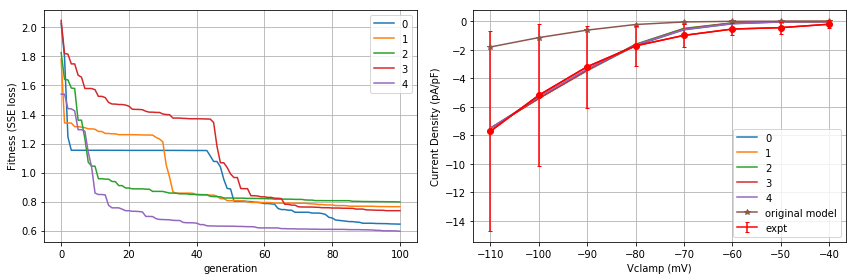

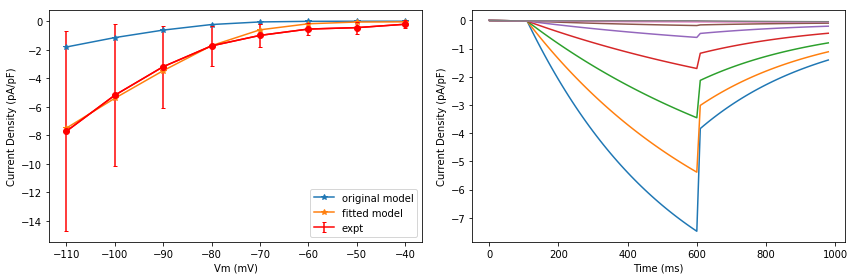

[0.005755847799203669, 0.07733436066579695, 0.17790866516685735, 0.33975456393285036, 0.5826708436827175, 0.9626367699665328, 1.5160831019165926, 2.31108681926659, 3.323116641332551, 4.695569753400438, 6.434211955366966]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import If_worker

Vcm = np.arange(-110, -39, 10)
ini_par = np.array([0.02343, 0.01456, 2.9, 0.04, 3.6, 0.11, 4000])

If_act = np.array(
[-7.719292191, -5.191894995, -3.191078509, -1.729348794, -0.995212502, -0.550478633, -0.451653444, -0.213560445])
If_err = np.array([7.004261908, 4.972815047, 2.878205575, 1.38609859, 0.816391, 0.443526266, 0.421838918, 0.266044595])

If_pks_ini = If_worker.If_func(ini_par)
time, plot_If_ini, plot_y_ini = If_worker.If_func_time(ini_par)

class GA_trial:
    gen_num = 0
    loss = 0
    R_sq_ini = 0
    R_sq_fin = 0
    Parameters = 0
    final_fit_Val = 0
    time = 0
    cur_time_fit = 0
    cur_time_ini = 0
    Vcm = 0
    gen_fit_arr = 0
    I_peaks_fin = 0
    I_peaks_ini = 0
    Runtime = 0
    
GA0 = pickle.load(open('If_GA_trial6.p', 'rb'))
GA1 = pickle.load(open('If_GA_trial1.p', 'rb'))
GA2 = pickle.load(open('If_GA_trial2.p', 'rb'))
GA3 = pickle.load(open('If_GA_trial3.p', 'rb'))
GA4 = pickle.load(open('If_GA_trial4.p', 'rb'))

print('Parameters_______')
print('0: ', GA0.Parameters)
print('1: ', GA1.Parameters)
print('2: ', GA2.Parameters)
print('3: ', GA3.Parameters)
print('4: ', GA4.Parameters)
print('\n')

print('R_sq_____')
print('0: ', GA0.R_sq_fin)
print('1: ', GA1.R_sq_fin)
print('2: ', GA2.R_sq_fin)
print('3: ', GA3.R_sq_fin)
print('4: ', GA4.R_sq_fin)
print('\n')

trials_r2 = np.array([GA0.R_sq_fin, GA1.R_sq_fin, GA2.R_sq_fin, GA3.R_sq_fin, GA4.R_sq_fin])

r2_mean = np.mean(trials_r2)
r2_stdv = np.std(trials_r2)

loss_ini = np.array([GA0.loss[0], GA1.loss[0], GA2.loss[0], GA3.loss[0], GA4.loss[0]])

loss_fin = np.array([GA0.loss[-1], GA1.loss[-1], GA2.loss[-1], GA3.loss[-1], GA4.loss[-1]])

loss_ini_mean = np.mean(loss_ini)
loss_ini_stdv = np.std(loss_ini)

loss_fin_mean = np.mean(loss_fin)
loss_fin_stdv = np.std(loss_fin)


print('R_sq:______')
print('Initial R2: ', GA1.R_sq_ini)
print('Initial R2: ', GA2.R_sq_ini)

print('mean R_sq: ', r2_mean)
print('std R_sq: ', r2_stdv)

print('initial losses:______\n ', loss_ini)
print('mean initial loss: ', loss_ini_mean)
print('std initial loss: ', loss_ini_stdv)

print('final losses:______\n ', loss_fin)
print('mean final loss: ', loss_fin_mean)
print('std final loss: ', loss_fin_stdv)


plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(GA0.gen_num, GA0.loss, label = '0')
plt.plot(GA1.gen_num, GA1.loss, label = '1')
plt.plot(GA2.gen_num, GA2.loss, label = '2')
plt.plot(GA3.gen_num, GA3.loss, label = '3')
plt.plot(GA4.gen_num, GA4.loss, label = '4')

plt.grid()
# plt.yscale('log')
plt.xlabel('generation')
plt.ylabel('Fitness (SSE loss)')
plt.legend()


plt.subplot(122)
plt.grid()
plt.plot(GA0.Vcm, GA0.I_peaks_fin, label='0')
plt.plot(GA1.Vcm, GA1.I_peaks_fin, label='1')
plt.plot(GA2.Vcm, GA2.I_peaks_fin, label='2')
plt.plot(GA3.Vcm, GA3.I_peaks_fin, label='3')
plt.plot(GA4.Vcm, GA4.I_peaks_fin, label='4')
plt.plot(Vcm, If_pks_ini, '-*', label='original model')
plt.errorbar(Vcm, If_act, yerr=If_err, capsize=2, color='red', label = 'expt')
plt.xlabel('Vclamp (mV)')
plt.ylabel('Current Density (pA/pF)')
plt.legend()
plt.plot(Vcm, If_act, 'r-o')
plt.tight_layout()
# plt.savefig('If_multi_gen_loss.png')
plt.show()

time, plt_If_fit, plot_y_fit = If_worker.If_func_time(GA0.Parameters)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(Vcm, If_pks_ini, '-*', label='original model')
plt.plot(Vcm, GA0.I_peaks_fin, '-*', label='fitted model')
plt.errorbar(Vcm, If_act, yerr=If_err, capsize=2, color='red', label = 'expt')
plt.legend()
plt.xlabel('Vm (mV)')
plt.ylabel('Current Density (pA/pF)')
plt.plot(Vcm, If_act, 'r-o')

plt.subplot(122)
plt.plot(time, plt_If_fit)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.tight_layout()
# plt.savefig('If_IV_n_time.png')
plt.show()

print(GA0.Runtime)


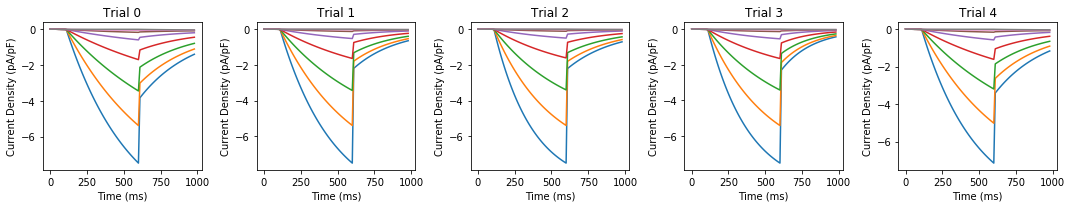

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,3))
# GA1.Parameters[-1] = GA0.Parameters[-1]
plt.subplot(151)
time, plt_If_fit, plot_y_fit = If_worker.If_func_time(GA0.Parameters)
plt.plot(time, plt_If_fit)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 0')
plt.subplot(152)
time, plt_If_fit, plot_y_fit = If_worker.If_func_time(GA1.Parameters)
plt.plot(time, plt_If_fit)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 1')
plt.subplot(153)
time, plt_If_fit, plot_y_fit = If_worker.If_func_time(GA2.Parameters)
plt.plot(time, plt_If_fit)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 2')
plt.subplot(154)
time, plt_If_fit, plot_y_fit = If_worker.If_func_time(GA3.Parameters)
plt.plot(time, plt_If_fit)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 3')
plt.subplot(155)
time, plt_If_fit, plot_y_fit = If_worker.If_func_time(GA4.Parameters)
plt.plot(time, plt_If_fit)
plt.xlabel('Time (ms)')
plt.ylabel('Current Density (pA/pF)')
plt.title('Trial 4')

plt.tight_layout()
plt.savefig('If_time_course_fits.png')
plt.show()